In [1]:
# Script to calculate gaussian beam propagation:

In [2]:
#Version 1:
# This script aims on calculating the optimal parameters to couple a beam out of the optical fiber and into the high-finesse cavity
# Concept up to now:
# Calculate waist and position of waist before the incoupling lens of the cavity
# determine the best distance between lens and cavity as well as for outcoupling lens graphically

General Section:
Import modules; define functions; define constants

In [34]:
#Import area
import numpy as np
from sympy.physics.optics import rayleigh2waist, BeamParameter, FreeSpace, CurvedRefraction, FlatRefraction, ThinLens
import sympy as sp
from sympy.plotting import plot
from sympy.utilities.lambdify import lambdify
import operator
import matplotlib.pyplot as plt
from sympy import I,re,im
#from sympy.physics.optics import BeamParameter, GeometricRay

In [35]:
def calculateBeam(p, matrix_list):
    mat = reduce(operator.mul, matrix_list[::-1], 1)  # Multiply matrices
    print(mat)
    return mat * p

def calculateBeamInv(p, matrix_list):
    matrix_list_inv = [i.inv() for i in matrix_list]
    mat = reduce(operator.mul, matrix_list_inv[::], 1)  # Multiply matrices
    print(mat)
    return mat * p

def calculate_z(w,w_0,r_curv,wavelength):
    return -sp.sign(r_curv)*(np.pi*w_0**2/wavelength)*((w/w_0)**2-1.0)**0.5


#Calculate beam_parameters inside cavity:
def rayleigh_length(z, r_curv_at_z):
    return sp.sqrt(z*(r_curv_at_z-z))


In [46]:
#Define important constants

um=10**(-6)
nm=10**(-9)
lambda_960=960*nm
lambda_780=780*nm
n_vac=1
n_air=1.000292 #For more exact value see Edlen1966
n_ULE_780=1.4768 #at 780nm; calculated from ULE Corning datasheet
n_ULE_960=1.4742 #at 960nm; calculated from ULE Corning datasheet
n_entrance_window=1.5
d_entrance_window=2*10**-3
angle_entrance_window=2/180*np.pi
f_incoupling_lens=0.3
d_in=sp.symbols('d_in', real=True) #d_in is the distance between the incoupling lens and the cavity window
#print(im(d_in))
d_btw_outc_cavlens=0.7 # s'+d_in=d_btw_outc_cavlens; s' distance lens to waist outcoupler, d_in: distance waist to cavity lens

# mode field diameter =2*waist
MFD_780=4.9*um
p_coupl_780=BeamParameter(lambda_780,0,w=MFD_780/2)

d0=sp.symbols('d0')
f_outcoupling=5*10**-3


Cavity Section:
Calculate beam properties of the beam that has to be coupled into the cavity starting from the properties of the cavity.

In [47]:
#Calculate the rayleigh length, which is independent of the wave length and only given by the cavity properties:
z_r=rayleigh_length(0.1,0.5)

#calculate the waist at the plane mirror:
w_0_780nm=rayleigh2waist(rayleigh_length(0.1,0.5),lambda_780)
w_0_960nm=rayleigh2waist(rayleigh_length(0.1,0.5),lambda_960)
print(w_0_780nm.n(),w_0_960nm.n())

#Define the beam parameters at the plane mirror:
p_0_780nm=BeamParameter(lambda_780,0,w=w_0_780nm).n()
p_0_960nm=BeamParameter(lambda_960,0,w=w_0_960nm).n()



(0.000222837030685367, 0.000247215489294841)


In [48]:
#List of optical elements for 780 and 960nm because of different indices of refraction:
opt_element_list_780=[]
opt_element_list_780.append(FreeSpace(0.1))
opt_element_list_780.append(CurvedRefraction(0.5,n_vac,n_ULE_780))
opt_element_list_780.append(FreeSpace(0.25*2.54*0.01))
opt_element_list_780.append(FlatRefraction(n_ULE_780,n_vac))
opt_element_list_780.append(FreeSpace(74.15*10**(-3))) #Double check: (261mm-(100mm+2*0.25*25.4mm))/2
opt_element_list_780.append(FlatRefraction(n_vac,n_entrance_window))
opt_element_list_780.append(FreeSpace(d_entrance_window))
opt_element_list_780.append(FlatRefraction(n_entrance_window,n_vac))
opt_element_list_780.append(FreeSpace(d_in))
opt_element_list_780.append(ThinLens(f_incoupling_lens))
#opt_element_list_780.append(FreeSpace(0.9))
#opt_element_list_780.append(ThinLens(f_outcoupling))
#opt_element_list_780.append(FreeSpace(d0))
#opt_element_list_780.append()
#print(opt_element_list_780)


opt_element_list_960=[]
opt_element_list_960.append(FreeSpace(0.1))
opt_element_list_960.append(CurvedRefraction(0.5,n_vac,n_ULE_960))
opt_element_list_960.append(FreeSpace(0.25*2.54*0.01))
opt_element_list_960.append(FlatRefraction(n_ULE_960,n_vac))
opt_element_list_960.append(FreeSpace(74.15*10**(-3))) #Double check: (261mm-(100mm+2*0.25*25.4mm))/2
opt_element_list_960.append(FlatRefraction(n_vac,n_entrance_window))
opt_element_list_960.append(FreeSpace(d_entrance_window))
opt_element_list_960.append(FlatRefraction(n_entrance_window,n_vac))
opt_element_list_960.append(FreeSpace(d_in))
opt_element_list_960.append(ThinLens(f_incoupling_lens))
#opt_element_list_960.append(FreeSpace(0.9))
#opt_element_list_960.append(ThinLens(f_outcoupling))
#opt_element_list_960.append(FreeSpace(d0))
#opt_element_list_960.append()
#print(opt_element_list_960)

In [51]:
#Calculate beam_parameter for 780nm outside of the cavity:
p1_780=calculateBeam(p_0_780nm,opt_element_list_780)
#print(p1_780.radius.n())
#print(p1_780.w.n())
#print(p1_780.w_0.n())
#print(calculate_z(p1_780.w.n(),p1_780.w_0.n(),p1_780.radius.n(),lambda_780))

#Calculate beam_parameter for 960nm outside of the cavity:
p1_960=calculateBeam(p_0_960nm,opt_element_list_960)
#print(p1_960.radius.n())
#print(p1_960.w.n())
#print(p1_960.w_0.n())
#print(calculate_z(p1_960.w.n(),p1_960.w_0.n(),p1_780.radius.n(),lambda_960))

Matrix([[-0.9536*d_in + 0.923918768306248, 0.90464*d_in + 0.172175047650415], [3.17866666666667*d_in - 4.03332922768749, -3.01546666666667*d_in + 0.330723174498615]])


In [9]:
#Test backwards direction:

#p_init=BeamParameter(lambda_780,-calculate_z(p1_780.w.n(),p1_780.w_0.n(),p1_780.radius.n(),lambda_780),w=p1_780.w_0.n())
#p_final=calculateBeamInv(p_init, opt_element_list)
#print(p_final.radius.n())
#print(p_final.w_0.n())
#print(calculate_z(p_final.w.n(),p_final.w_0.n(),p_final.radius.n(),lambda_780))

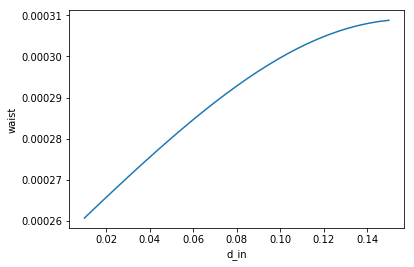

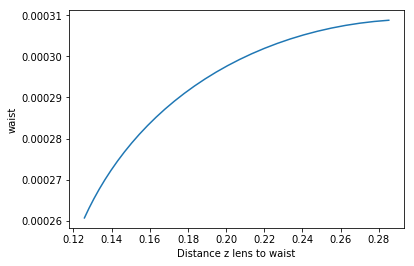

0.000292788162495
0.183418648925
0.000847990947132


In [10]:
#Calculate incoupling waist:
waist_in=lambdify(d_in,p1_780.w_0,'numpy')
d_in_list=np.linspace(0.01,0.15,num=31)
#print(waist_in(d_in_list))
plt.plot(d_in_list,waist_in(d_in_list))
plt.xlabel('d_in')
plt.ylabel('waist')
plt.show()

func_z_cav_lens=lambdify(d_in,calculate_z(p1_780.w.n(),p1_780.w_0.n(),p1_780.radius.n(),lambda_780),'numpy')

plt.plot(func_z_cav_lens(d_in_list),waist_in(d_in_list))
plt.xlabel('Distance z: lens to waist')
plt.ylabel('waist')
plt.show()

divergence_in=lambdify(d_in,p1_780.divergence,'numpy')

print(waist_in(0.08))
print(func_z_cav_lens(0.08))
print(divergence_in(0.08))

Outcoupling Section: Calculate beam properties after the outcoupling lens

In [11]:
# Calculate parameters of beam coming from outcoupling lens


coupling_opt_list=[]
coupling_opt_list.append(FreeSpace(d0))
coupling_opt_list.append(ThinLens(f_outcoupling))
#coupling_opt_list.append(FreeSpace(f_outcoupling+t1))
#coupling_opt_list.append(ThinLens(t1))
#coupling_opt_list.append(FreeSpace(t1+t2))
#coupling_opt_list.append(ThinLens(t2))
#coupling_opt_list.append(FreeSpace(d1))
p_final=calculateBeam(p_coupl_780, coupling_opt_list)

#plot1=plot(p_final)
d0_list=np.linspace(f_outcoupling,f_outcoupling*1.1,num=101)
func_w_0 = lambdify(d0, p_final.w_0,'numpy') # returns a numpy-ready function for w_0
func_z = lambdify(d0, calculate_z(p_final.w,p_final.w_0,p_final.radius,lambda_780),'numpy') # returns a numpy-ready function for z
func_r= lambdify(d0, p_final.radius,'numpy') # returns a numpy-ready function for radius of curvature
func_div= lambdify(d0, p_final.divergence,'numpy') # returns a numpy-ready function for divergence
w_0_list = func_w_0(d0_list)
z_list= func_z(d0_list)
r_list= func_r(d0_list)


print(func_w_0(5.035*10**-3))
print(func_z(5.035*10**-3))
print(func_div(5.035*10**-3))
#print(z_list)
#print(r_list)
#print(p_final.w_0)
#print(p_final.w.evalf())
#print(calculate_z(p_final.w.n(),p_final.w_0.n(),lambda_780))

#Plot w_0 with respect to d_0





Matrix([[1, d0], [-200.000000000000, -200.0*d0 + 1]])
0.000287977363679
0.488562460593
0.00086215703919


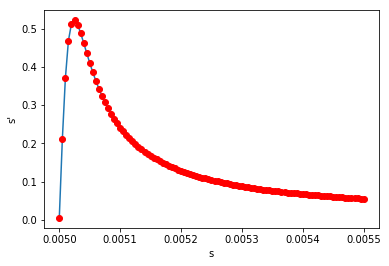

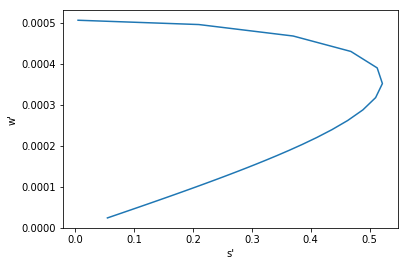

In [12]:
#Calculate Gaussian beam properties with simpler formulae taken from "Fokussierung und opt. Abbildung in der Lasertechnik"
def w1(w0,f,s,lambda_0):
    z_r0=(np.pi*w0**2)/lambda_0
    return w0*f*sp.sqrt(1/((s-f)**2+z_r0**2))

def s1(w0,f,s,lambda_0):
    z_r0=(np.pi*w0**2)/lambda_0
    #print(z_r0)
    return f+(f**2*(s-f))/((s-f)**2+z_r0**2)

func_w1=lambdify(d0,w1(MFD_780/2,f_outcoupling,d0,lambda_780),'numpy')

#w1_list_simple=func_w1(d0_list)
w1_list_simple=[w1(MFD_780/2,f_outcoupling,d0,lambda_780) for d0 in d0_list]
s1_list_simple=[s1(MFD_780/2,f_outcoupling,d0,lambda_780) for d0 in d0_list]
#print(w1_list_simple)
#print(s1_list_simple)

plt.plot(d0_list,s1_list_simple)
plt.plot(d0_list,z_list,'ro')
plt.xlabel("s")
plt.ylabel("s'")
plt.show()

fig1 = plt.plot(s1_list_simple,w1_list_simple)
plt.xlabel("s'")
plt.ylabel("w'")
plt.show()

Graphically find the overlap of beam properties between the outcoupled beam and the required incoupling beam

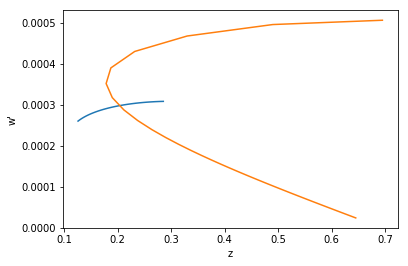

In [13]:
plt.plot(func_z_cav_lens(d_in_list),waist_in(d_in_list))
plt.plot([d_btw_outc_cavlens-i for i in s1_list_simple],w1_list_simple)
plt.xlabel("z")
plt.ylabel("w'")
plt.show()